In [ ]:
# Final Project - Dangerous Driving

### Description

In this project, I analyzed nationwide driving fatalies and other bad driving data.

**Datasets**: 
* FARS 2015. Fars is a nationwide census providing NHTSA, Congress and the American public yearly data regarding fatal injuries suffered in motor vehicle traffic crashes.
* Worst Drivers by State  ('https://onedrive.live.com/?authkey=%21AGxFVA%2D0Ja1e8No&id=43EBDBC5D5265516%219934&cid=43EBDBC5D5265516')

In [3]:
%matplotlib inline  

import pandas as pd
import numpy as np
pd.options.display.max_columns = 55

In [5]:
# Dataset accessed from here: ftp://ftp.nhtsa.dot.gov/fars/2015/National/FARS2015NationalCSV.zip
df = pd.read_csv('https://raw.githubusercontent.com/paisely65/IS-362-Final-Project/master/accident.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32166 entries, 0 to 32165
Data columns (total 52 columns):
STATE         32166 non-null int64
ST_CASE       32166 non-null int64
VE_TOTAL      32166 non-null int64
VE_FORMS      32166 non-null int64
PVH_INVL      32166 non-null int64
PEDS          32166 non-null int64
PERNOTMVIT    32166 non-null int64
PERMVIT       32166 non-null int64
PERSONS       32166 non-null int64
COUNTY        32166 non-null int64
CITY          32166 non-null int64
DAY           32166 non-null int64
MONTH         32166 non-null int64
YEAR          32166 non-null int64
DAY_WEEK      32166 non-null int64
HOUR          32166 non-null int64
MINUTE        32166 non-null int64
NHS           32166 non-null int64
RUR_URB       32166 non-null int64
FUNC_SYS      32166 non-null int64
RD_OWNER      32166 non-null int64
ROUTE         32166 non-null int64
TWAY_ID       32166 non-null object
TWAY_ID2      8400 non-null object
MILEPT        32166 non-null int64
LATITUDE      3

In [6]:
df.head()

,STATE,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERNOTMVIT,PERMVIT,PERSONS,COUNTY,CITY,DAY,MONTH,YEAR,DAY_WEEK,HOUR,MINUTE,NHS,RUR_URB,FUNC_SYS,RD_OWNER,ROUTE,TWAY_ID,TWAY_ID2,MILEPT,LATITUDE,LONGITUD,SP_JUR,HARM_EV,MAN_COLL,RELJCT1,RELJCT2,TYP_INT,WRK_ZONE,REL_ROAD,LGT_COND,WEATHER1,WEATHER2,WEATHER,SCH_BUS,RAIL,NOT_HOUR,NOT_MIN,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN,CF1,CF2,CF3,FATALS,DRUNK_DR
0,1,10001,1,1,0,0,0,1,1,127,0,1,1,2015,5,2,40,0,1,3,1,3,SR-5,NaN,1754,33.878653,-87.325328,0,35,0,0,1,1,0,4,2,1,0,1,0,0,99,99,2,58,88,88,0,0,0,1,1
1,1,10002,1,1,0,0,0,1,1,83,0,1,1,2015,5,22,13,1,1,1,1,1,I-65,NaN,3604,34.910442,-86.908708,0,34,0,0,1,1,0,3,2,10,0,10,0,0,99,99,22,20,88,88,0,0,0,1,0
2,1,10003,1,1,0,0,0,2,2,11,0,1,1,2015,5,1,25,0,1,3,1,2,US-SR 6,NaN,1958,32.142006,-85.758456,0,42,0,0,1,1,0,4,2,1,0,1,0,0,99,99,1,45,99,99,0,0,0,1,1
3,1,10004,1,1,0,0,0,1,1,45,0,4,1,2015,1,0,57,0,1,4,1,3,SR-27,NaN,566,31.439814,-85.510300,0,53,0,0,1,1,0,4,2,10,0,10,0,0,99,99,1,15,88,88,0,0,0,1,1
4,1,10005,2,2,0,0,0,2,2,45,2050,7,1,2015,4,7,9,0,2,3,1,2,US-SR 53,HINTON WATERS AVE,308,31.319331,-85.515100,0,12,6,0,2,3,0,1,1,1,0,1,0,0,99,99,7,16,88,88,0,0,0,1,0


In [8]:
# Convert the columns of Day, Month, Year, Hour, Minute into a single datetime column
# Requirements: Project includes at least one data transformation operation.

datetime = df[['YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE']]
datetime = datetime.rename(columns={'YEAR': 'year', 'MONTH': 'month', 'DAY': 'day', 
                                    'HOUR': 'hour', 'MINUTE': 'minute'})
df['DATETIME'] = pd.to_datetime(datetime)

In [9]:
# Replace STATE column with appropriate state names
state_codes = {1: 'Alabama', 2: 'Alaska', 4: 'Arizona',  5: 'Arkansas', 6: 'California', 
8: 'Colorado', 9: 'Connecticut', 10: 'Delaware', 11: 'District of Columbia', 12: 'Florida',
13: 'Georgia', 15: 'Hawaii', 16: 'Idaho', 17: 'Illinois', 18: 'Indiana',
19: 'Iowa', 20: 'Kansas', 21: 'Kentucky', 22: 'Louisiana', 23: 'Maine',
24: 'Maryland', 25: 'Massachusetts', 26: 'Michigan', 27: 'Minnesota',  28: 'Mississippi', 
29: 'Missouri', 30: 'Montana', 31: 'Nebraska', 32: 'Nevada', 33: 'New Hampshire',
34: 'New Jersey', 35: 'New Mexico', 36: 'New York', 37: 'North Carolina', 38: 'North Dakota',
39: 'Ohio', 40: 'Oklahoma', 41: 'Oregon', 42: 'Pennsylvania', 43: 'Puerto Rico',
44: 'Rhode Island', 45: 'South Carolina', 46: 'South Dakota', 47: 'Tennessee', 48: 'Texas',
49: 'Utah', 50: 'Vermont', 51: 'Virginia', 52: 'Virgin Islands', 53: 'Washington',
54: 'West Virginia', 55: 'Wisconsin', 56: 'Wyoming'}

df['STATE_NAME'] = df['STATE'].replace(state_codes)

In [7]:
# Sum the number of incidents and fatalities in each state
# Requirements: Project includes at least one grouping or aggregation.

print('Top 10 States with most fatal incidents')
print(df.groupby('STATE_NAME')['ST_CASE'].count().nlargest(10))
print()
print('Top 10 States with most number of fatalities')
print(df.groupby('STATE_NAME')['FATALS'].sum().nlargest(10))

Top 10 States with most fatal incidents
STATE_NAME
Texas             3124
California        2925
Florida           2699
Georgia           1327
North Carolina    1275
Pennsylvania      1102
New York          1046
Ohio              1029
Illinois           914
South Carolina     909
Name: ST_CASE, dtype: int64

Top 10 States with most number of fatalities
STATE_NAME
Texas             3516
California        3176
Florida           2939
Georgia           1430
North Carolina    1379
Pennsylvania      1200
New York          1121
Ohio              1110
Illinois           998
South Carolina     977
Name: FATALS, dtype: int64


Mean number of people involved in fatal car crash: 2.2904930672138284
Median number of people involved in fatal car crash: 2.0
Standard deviation of number of people involved in fatal car crash: 1.9451968673602624


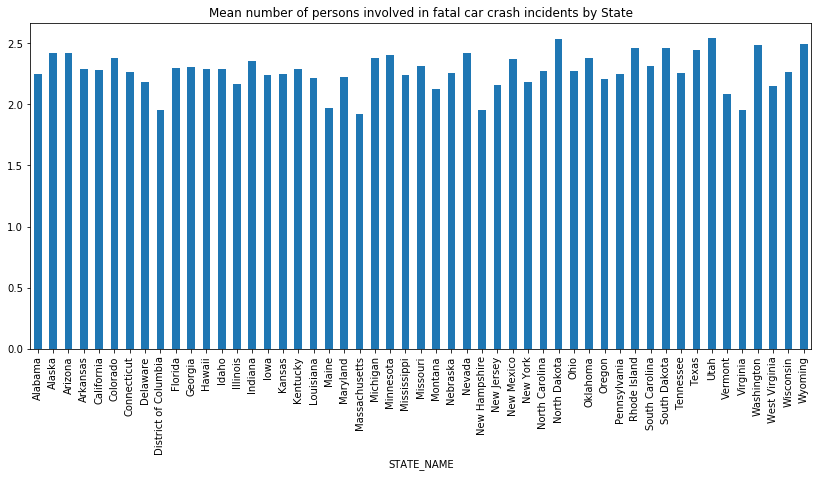

In [10]:
# Statistical analysis of the number of people involved in fatal car crash incident
# Requirements: Project includes at least one statistical analysis and at
#               least one graphics that describes or validates your data.

print('Mean number of people involved in fatal car crash:', df['PERSONS'].mean())
print('Median number of people involved in fatal car crash:', df['PERSONS'].median())
print('Standard deviation of number of people involved in fatal car crash:', df['PERSONS'].std())


df.groupby('STATE_NAME')['PERSONS'].mean().plot(kind='bar', figsize=(14,6), 
                                                title='Mean number of persons involved in fatal car crash incidents by State')

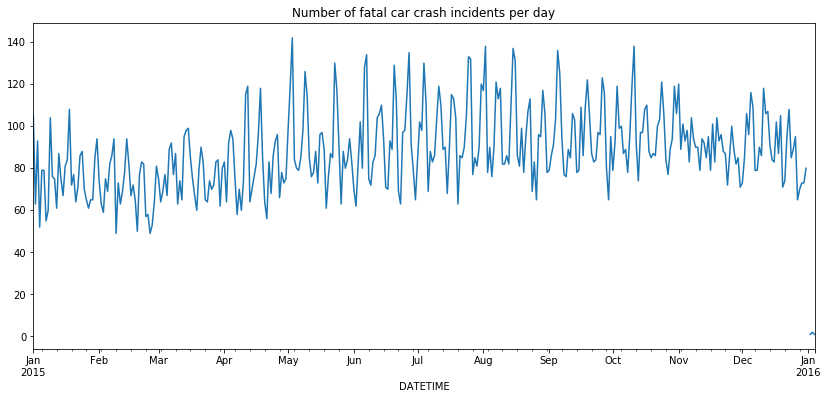

In [11]:
# Visualization of the number of fatal car crash incidents nationwide on a daily basis
df.index = df['DATETIME']

df['incident_count'] = 1

df['incident_count'].resample('1D').sum().plot(figsize=(14,6), title='Number of fatal car crash incidents per day')

In [12]:
# We try to predict the number of fatalities based on the number of persons involved, the hour of day and whether
# the incident was classified as a drunk driving incident. We use a machine learning technique similar to a logistic
# regression, but it actually uses a random forest to make the predictions. Ultimately, we score the algorithm using
# the r-squared metric. In this example, we see that the r-squared is very low so using only the columns we included,
# we can't make very good predictions about the number of people killed in a crash.

# Requirements: Project includes at least one feature that we did not cover in class!

from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import r2_score

X = df[['PERSONS', 'HOUR', 'DRUNK_DR']]
y = df['FATALS']

X_train, X_test, y_train, y_test = train_test_split(X, y)

rfclf = RandomForestRegressor(n_estimators=100)

rfclf.fit(X_train, y_train)

y_pred = rfclf.predict(X_test)

r2_score(y_test, y_pred)

/Users/candacegrant/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.035353870913777619

In [15]:
# Let's start to analyze the second dataset
df2 = pd.read_csv('https://raw.githubusercontent.com/paisely65/IS-362-Final-Project/master/Copy%20of%20Worst%20Drivers%20By%20State%202015.csv')

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
State                                                                      51 non-null object
Fatalities Rate per 100 Million Vehicle Miles Traveled                     51 non-null float64
Failure to Obey (Traffic Signals, Seat Belts, & Invalid Driver License)    51 non-null float64
Drunk Driving                                                              51 non-null float64
Speeding                                                                   51 non-null float64
Careless Driving                                                           51 non-null float64
Total Score                                                                51 non-null float64
Rank                                                                       51 non-null float64
dtypes: float64(7), object(1)
memory usage: 6.3+ KB


In [17]:
df2.head()

,State,Fatalities Rate per 100 Million Vehicle Miles Traveled,"Failure to Obey (Traffic Signals, Seat Belts, & Invalid Driver License)",Drunk Driving,Speeding,Careless Driving,Total Score,Rank
0,Alabama,15.0,14.0,18.0,29.0,26.0,102.0,12.0
1,Alaska,26.0,44.0,46.0,5.0,42.0,163.0,40.0
2,Arizona,10.0,7.0,47.0,17.0,3.0,84.0,6.0
3,Arkansas,8.0,8.0,31.0,50.0,19.0,116.0,20.0
4,California,40.0,15.0,33.0,23.0,9.0,120.0,22.0


In [20]:

print (df2.sort_values('Fatalities Rate per 100 Million Vehicle Miles Traveled', 
                ascending=False)[['State']].head(10))
print()
print()
print('Top 10 States with most fatal incidents')
print(df.groupby('STATE_NAME')['ST_CASE'].count().nlargest(10))

                   State
8   District of Columbia
21         Massachusetts
23             Minnesota
30            New Jersey
47            Washington
44                  Utah
20              Maryland
39          Rhode Island
35                  Ohio
6            Connecticut


Top 10 States with most fatal incidents
STATE_NAME
Texas             3124
California        2925
Florida           2699
Georgia           1327
North Carolina    1275
Pennsylvania      1102
New York          1046
Ohio              1029
Illinois           914
South Carolina     909
Name: ST_CASE, dtype: int64


## Conclusion
For my final project, I wanted to look more closely at driving fatalities and other bad driving statistics, in part because with new machine learning technology and advancements in computer vision algorithms, self-driving cars will soon become commonplace. But, until we have presumably safer self-driving cars, we need to study car crashes so we can make policies and develop technology to make driving safer. In this analysis, I performed some exploratory data analysis, highlighting the states with the most car crashes resulting in fatalities. Texas, California and Florida had the most fatalities in absolute numbers, however it is important to note that we did not normalize the data for population size. A quick Google search indicates that Texas, California and Florida are in fact the three most populous states in the US, so it is not terribly surprising that they also have the most car crashes. In a future analysis, I could normalize by population size to determine which states have the most crashes on a relative basis. I also built a very simple machine learning algorithm to predict the number of fatalities in a car crash incident using just three variables: hour of day, number of persons involved and whether it was a drunk driving incident. The algorithm ultimately did not perform very well (R-squared value of .035), however it does open the door for building a more robost model with many more variables. In the last part of the analysis, I included a dataset known as the "Worst Drivers by State." This dataset ranks each state according to several criteria, including number of drunk driving incidents, speeding incidents, fatal car crashes, among others. When we compare the 10 ranked worst states for driving fatalities, we notice that the states are different from the ten states with the most absolute number of driving fatalities. Why is this the case? Well, in the new dataset, states are ranked based on fatalities per 100 million vehicle miles traveled. This unit of measurement normalizes the data and clearly affects the results. It serves as an important reminder that we must always normalize data when comparing it.